In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data=pd.read_csv('../Dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [66]:
onehot=['gender','ever_married','work_type','Residence_type','smoking_status']
for i in range(len(onehot)):
    print(f"{data[onehot[i]].value_counts()}")

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [67]:
encoded_data= pd.get_dummies(data,columns=onehot,drop_first=True)
encoded_data=encoded_data.drop(axis=0,columns='id')

In [68]:
num_col=[col for col in encoded_data.select_dtypes(include=['int64','float64',]).columns]
num_col=num_col[:-1]
print(num_col)


['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [69]:
encoded_data=encoded_data.astype({
    col:'int'
    for col in encoded_data.select_dtypes('bool').columns
})

In [70]:
print(encoded_data)

       age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     61.0             0              0             202.21   NaN       1   
2     80.0             0              1             105.92  32.5       1   
3     49.0             0              0             171.23  34.4       1   
4     79.0             1              0             174.12  24.0       1   
...    ...           ...            ...                ...   ...     ...   
5105  80.0             1              0              83.75   NaN       0   
5106  81.0             0              0             125.20  40.0       0   
5107  35.0             0              0              82.99  30.6       0   
5108  51.0             0              0             166.29  25.6       0   
5109  44.0             0              0              85.28  26.2       0   

      gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         

In [71]:
# data_encode=encoded_data.drop(columns='id')
# data_encode.corr()
encoded_data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257,-0.027623,-0.010659,0.679125,-0.078653,0.116534,0.327989,-0.634215,0.014180,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904,0.021275,-0.004597,0.164243,-0.021608,-0.005413,0.115442,-0.129506,-0.007913,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914,0.085717,-0.003343,0.114644,-0.015712,0.000027,0.086760,-0.091634,0.003092,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945,0.054580,0.011489,0.155068,-0.014675,0.016588,0.062694,-0.102250,-0.004946,0.068111,0.023885,0.017646
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374,-0.026020,-0.011802,0.341695,-0.028602,0.208029,0.072701,-0.448674,-0.000122,0.107031,0.107964,0.088324
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000,0.009117,-0.003166,0.108340,-0.014882,0.011888,0.062168,-0.083869,0.015458,0.064556,-0.004129,0.008939
gender_Male,-0.027623,0.021275,0.085717,0.054580,-0.026020,0.009117,1.000000,-0.011757,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477
gender_Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.011757,1.000000,-0.019327,-0.000920,0.012092,-0.006112,-0.005514,-0.014217,0.030568,-0.010728,-0.005978
ever_married_Yes,0.679125,0.164243,0.114644,0.155068,0.341695,0.108340,-0.029936,-0.019327,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226
work_type_Never_worked,-0.078653,-0.021608,-0.015712,-0.014675,-0.028602,-0.014882,0.011496,-0.000920,-0.090838,1.000000,-0.076081,-0.028728,-0.025915,0.022859,-0.030095,0.036238,-0.028099


In [72]:
encoded_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


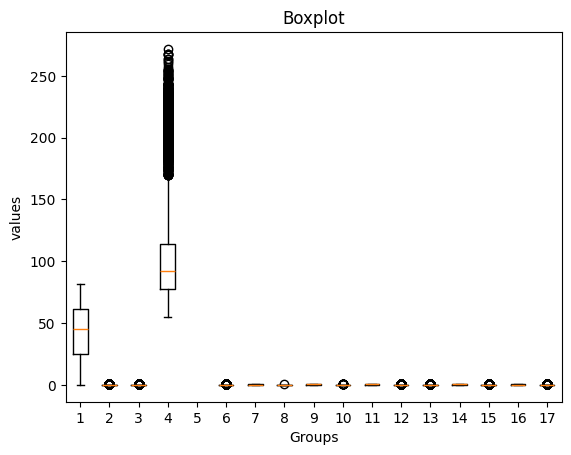

In [73]:
plt.boxplot(encoded_data)
plt.xlabel("Groups")
plt.ylabel("values")
plt.title("Boxplot")
plt.show()

In [74]:
encoded_data.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Male                         int64
gender_Other                        int64
ever_married_Yes                    int64
work_type_Never_worked              int64
work_type_Private                   int64
work_type_Self-employed             int64
work_type_children                  int64
Residence_type_Urban                int64
smoking_status_formerly smoked      int64
smoking_status_never smoked         int64
smoking_status_smokes               int64
dtype: object

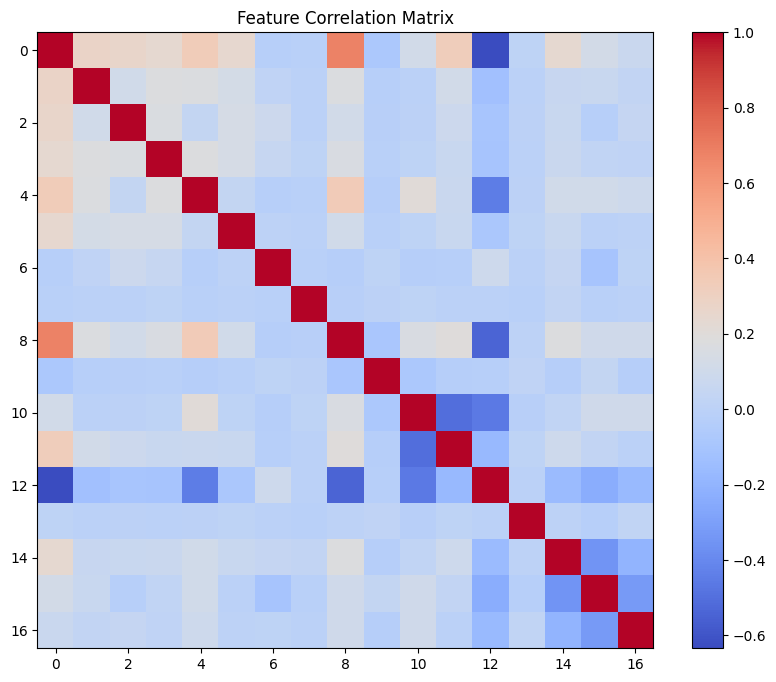

In [75]:
corr = encoded_data.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.title("Feature Correlation Matrix")
plt.show()


In [76]:
encoded_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
def standarize(X_train,X_test):
    mean=np.mean(X_train,axis=0)
    std=np.std(X_train,axis=0)
    std[std==0]=1
    X_train_std=(X_train-mean)/std
    X_test_std=(X_test-mean)/std
    return X_train_std,X_test_std

In [78]:
def gz(z):
    return 1/(1+np.exp(-z))

In [79]:
def train_test_split(X,y,random_state=None,shuffle=True,test_size=0.2):
    if shuffle:
        if random_state:
            np.random.seed(random_state)
        idx=np.arange(X.shape[0])
        np.random.shuffle(idx)
        X=X.iloc[idx]
        y=y.iloc[idx]
        index=int(X.shape[0]*(1-test_size))
        X_train=X[:index]
        X_test=X[index:]
        y_train=y[:index]
        y_test=y[index:]

    return X_train,X_test,y_train,y_test

In [80]:

def loss(X,y,w,b,pos_weight,neg_weight):
    z=np.dot(X,w)+b
    f_wb=gz(z)
    eps = 1e-15
    left=-((y)*np.log(f_wb+eps))
    right=-(1-y)*np.log(1-f_wb+eps)
    return (pos_weight*left)+(neg_weight*right)


In [81]:
def cost(X,y,w,b,pos_weight,negative_weight):
    m=X.shape[0]
    loss_=np.sum(loss(X,y,w,b,pos_weight,negative_weight))
    cost=(1/m)*loss_
    return cost
    

In [82]:
def partial_Derivative(X,y,w,b,pos_weight,neg_weight):
    m=X.shape[0]
    dj_dw=0
    dj_db=0
    f_wb=gz(np.dot(X,w)+b)
    weight=np.where(y==1,pos_weight,neg_weight)
    error=f_wb-y
    dj_dw=np.dot(X.T,weight*error)
    dj_dw=dj_dw/m
    dj_db=(1/m)*np.sum(f_wb-y)
    return dj_dw,dj_db
    

In [83]:
def gradient(X,y,w,b,num_iters,alpha,pos_weight,negative_weight):
    cost_history=[]
    for i in range(num_iters):
        dj_dw,dj_db=partial_Derivative(X,y,w,b,pos_weight,negative_weight)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i%100==0:
            cost_history.append(cost(X,y,w,b,pos_weight,negative_weight))
        if i%1000==0:
            print(f" Cost {i} : {cost_history[-1]:.10f}")
    return w,b,cost_history

In [84]:
X=encoded_data.drop(axis=0,columns='stroke')
y=encoded_data['stroke']


In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(4088, 16)
(1022, 16)


In [86]:
print(X_train['bmi'].isna().sum())
X_train.loc[:,'bmi']=X_train['bmi'].fillna(X_train['bmi'].median())
X_test.loc[:,'bmi']=X_test['bmi'].fillna(X_train['bmi'].median())
print(X_train['bmi'].isna().sum())

164
0


In [87]:
X_train_num,X_test_num=X_train[num_col],X_test[num_col]
X_train_std,X_test_std=standarize(X_train_num,X_test_num)
print(X_train_std.head())
print(X_test_std.head())

           age  hypertension  heart_disease  avg_glucose_level       bmi
4688 -0.552589     -0.332971      -0.240772          -0.916167 -0.771832
4478 -0.153606     -0.332971      -0.240772          -0.906473 -0.079628
3849 -1.572213     -0.332971      -0.240772          -0.705326 -0.837134
4355  1.575322      3.003266      -0.240772          -0.656416 -1.228947
3826  1.397996     -0.332971      -0.240772          -0.256986 -0.223293
           age  hypertension  heart_disease  avg_glucose_level       bmi
4077 -0.596920     -0.332971      -0.240772          -0.231209  0.286065
2106 -0.729915     -0.332971      -0.240772          -0.170182 -0.366958
2679 -1.261892     -0.332971      -0.240772           1.843934 -1.072222
3229 -0.774246     -0.332971      -0.240772          -0.466284 -0.562864
2761 -0.020611     -0.332971      -0.240772          -0.410104  1.291719


In [88]:
X_train.loc[:,num_col]=X_train_std
X_test.loc[:,num_col]=X_test_std
print(X_train)

           age  hypertension  heart_disease  avg_glucose_level       bmi  \
4688 -0.552589     -0.332971      -0.240772          -0.916167 -0.771832   
4478 -0.153606     -0.332971      -0.240772          -0.906473 -0.079628   
3849 -1.572213     -0.332971      -0.240772          -0.705326 -0.837134   
4355  1.575322      3.003266      -0.240772          -0.656416 -1.228947   
3826  1.397996     -0.332971      -0.240772          -0.256986 -0.223293   
...        ...           ...            ...                ...       ...   
3953 -0.197937     -0.332971      -0.240772          -0.410765  1.448445   
2768  1.265002      3.003266      -0.240772           2.760002 -0.105749   
735   1.309333     -0.332971      -0.240772          -0.491841 -0.131870   
4809  1.397996      3.003266      -0.240772           2.821690 -0.223293   
5038  0.511367     -0.332971      -0.240772          -0.905592  0.103218   

      gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
4688      

/tmp/ipykernel_3357/1877369664.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.33297082 -0.33297082 -0.33297082 ... -0.33297082  3.0032662
 -0.33297082]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:,num_col]=X_train_std
/tmp/ipykernel_3357/1877369664.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.24077171 -0.24077171 -0.24077171 ... -0.24077171 -0.24077171
 -0.24077171]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:,num_col]=X_train_std
/tmp/ipykernel_3357/1877369664.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.33297082 -0.33297082 -0.33297082 ... -0.33297082 -0.33297082
 -0.33297082]' has dtype incompatible with int64, please explic

In [89]:
print(y_train.value_counts())

stroke
0    3882
1     206
Name: count, dtype: int64


In [90]:
X_train.shape

(4088, 16)

In [91]:
y_train.shape

(4088,)

In [92]:
w=np.zeros(X.shape[1]).reshape(-1,1)
w.shape

(16, 1)

In [93]:
N=len(y_train)
pos_n=np.sum(y_train)
neg_n=N-pos_n
pos_weight=N/pos_n
neg_weight=N/neg_n

In [94]:
w=np.zeros(X.shape[1])
b=0
num_iter=10000
alpha=0.0001
w,b,j_history=gradient(X_train,y_train,w,b,num_iter,alpha,pos_weight,neg_weight)

 Cost 0 : 1.3862291021


 Cost 1000 : 1.3284322234
 Cost 2000 : 1.2828305415
 Cost 3000 : 1.2462134327
 Cost 4000 : 1.2162990198
 Cost 5000 : 1.1914719566
 Cost 6000 : 1.1705776157
 Cost 7000 : 1.1527773581
 Cost 8000 : 1.1374508640
 Cost 9000 : 1.1241308723


In [95]:
print(np.isnan(X_train).any())


age                               False
hypertension                      False
heart_disease                     False
avg_glucose_level                 False
bmi                               False
gender_Male                       False
gender_Other                      False
ever_married_Yes                  False
work_type_Never_worked            False
work_type_Private                 False
work_type_Self-employed           False
work_type_children                False
Residence_type_Urban              False
smoking_status_formerly smoked    False
smoking_status_never smoked       False
smoking_status_smokes             False
dtype: bool


In [96]:
w

array([ 3.97861153e-01,  1.72406607e-01,  1.55674917e-01,  1.62462046e-01,
        2.28325860e-02, -2.12483414e-03, -1.06502364e-04,  6.94796281e-02,
       -1.57967261e-03, -4.74857662e-03,  3.87393313e-02, -4.06162607e-02,
        1.97291257e-03,  4.09507611e-02, -9.83122755e-03,  4.17410822e-04])

In [97]:
def predict(X,w,b,threshold=0.5):
    return (gz(np.dot(X,w)+b)>=threshold).astype(int)
      

In [98]:
y_pred=predict(X_train,w,b)
print("Predicted positives:", y_pred.sum())
print("Actual positives:", y_train.sum())

Predicted positives: 1083
Actual positives: 206


In [99]:
y_pred_test=predict(X_test,w,b)

print("Predicted positive in test: ",y_pred_test.sum())
print("Actual positive :",y_test.sum())

Predicted positive in test:  254
Actual positive : 43


In [108]:
def precision(y_pred,y_test):
    tp=np.sum((y_pred==1) & (y_test==1))
    fp=np.sum((y_pred==1) & (y_test==0))
    return tp/(tp+fp+1e-15)


In [101]:
precision(y_pred,y_train)

0.14127423822714683


In [102]:
precision(y_pred_test,y_test)

0.12598425196850394


In [109]:
def recall(y_pred, y_true):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return tp / (tp + fn + 1e-15)

def f1_score(y_pred, y_true):
    p = precision(y_pred, y_true)
    r = recall(y_pred, y_true)
    return (2*p*r/(p + r +1e-15 ))


In [112]:
recall(y_pred,y_train)


np.float64(0.7427184466019418)

In [113]:

print(f"f1 score :{f1_score(y_pred,y_train)}")


f1 score :0.23739332816136516


In [114]:
recall(y_pred_test,y_test)


np.float64(0.7441860465116279)

In [115]:

print(f"f1 score :{f1_score(y_pred_test,y_test)}")


f1 score :0.21548821548821523
